In [9]:
import sys
sys.path.append('../')

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from config import const


plt.style.use('seaborn-v0_8')

year = 2017

sample_traffic_impact = pd.read_pickle(f'../data/processed/traffic_impact.pickle')
sample_weather = pd.read_pickle(f'../data/processed/weather.pickle')
sample_weather_traffic_impact = pd.merge(sample_weather, sample_traffic_impact, on='ID', how='left')
sample_weather_traffic_impact

,ID,Airport_Code,Weather_Timestamp,Temperature(C),Wind_Chill(C),Humidity(%),Pressure(in),Visibility(m),Wind_Direction,Wind_Speed(kmh),Precipitation(cm),Weather_Condition,Severity,Distance(m)
0,A-2047758,KBTR,2019-06-12 09:53:00,25.0,25.0,62.0,29.92,-12.2,NW,8.0,0.0,Fair,2,0.0
1,A-4694324,KIAD,2022-12-03 23:52:00,7.2,6.1,48.0,29.91,-12.2,W,8.0,0.0,Fair,2,90.1
2,A-5006183,KLPC,2022-08-20 12:56:00,20.0,20.0,73.0,29.79,-12.2,W,20.9,0.0,Fair,2,35.4
3,A-4237356,KAUM,2022-02-21 17:35:00,-2.8,-9.4,86.0,28.49,-12.2,ENE,24.1,0.0,Wintry Mix,2,1696.2
4,A-6690583,KBFL,2020-12-04 01:54:00,5.6,5.6,34.0,29.77,-12.2,CALM,0.0,0.0,Fair,2,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484231,A-6077227,KHIO,2021-12-15 07:14:00,4.4,0.0,77.0,29.55,-12.2,SSE,24.1,0.0,Light Rain,2,254.3
484232,A-6323243,KPBI,2021-12-19 16:53:00,25.6,25.6,87.0,29.94,-12.2,SSE,20.9,0.0,Partly Cloudy,2,64.4
484233,A-3789256,KPRC,2022-04-13 19:53:00,11.1,11.1,12.0,24.94,-12.2,WSW,19.3,0.0,Fair,2,883.5
484234,A-7030381,KSHD,2020-05-15 17:15:00,27.8,27.8,38.0,28.70,-12.2,SSW,22.5,0.0,Fair,3,0.0


In [11]:
def make_bin(sr, bin_name, bin_step):
    min_tempF = sr.min()
    max_tempF = sr.max()
    min_tempF_range = (min_tempF // bin_step) * bin_step - bin_step
    max_tempF_range = (max_tempF // bin_step) * bin_step + bin_step

    sample_weather_traffic_impact[bin_name] = pd.cut(
        sr,
        bins=np.arange(min_tempF_range, max_tempF_range + bin_step, bin_step)
    )
    return sample_weather_traffic_impact

In [12]:
make_bin(sample_weather_traffic_impact['Temperature(C)'], 'Temperature(C)(bin)', 5)
make_bin(sample_weather_traffic_impact['Wind_Chill(C)'], 'Wind_Chill(C)(bin)', 5)
make_bin(sample_weather_traffic_impact['Precipitation(cm)'], 'Precipitation(cm)(bin)', 1)

,ID,Airport_Code,Weather_Timestamp,Temperature(C),Wind_Chill(C),Humidity(%),Pressure(in),Visibility(m),Wind_Direction,Wind_Speed(kmh),Precipitation(cm),Weather_Condition,Severity,Distance(m),Temperature(C)(bin),Wind_Chill(C)(bin),Precipitation(cm)(bin)
0,A-2047758,KBTR,2019-06-12 09:53:00,25.0,25.0,62.0,29.92,-12.2,NW,8.0,0.0,Fair,2,0.0,"(20.0, 25.0]","(20.0, 25.0]","(-1.0, 0.0]"
1,A-4694324,KIAD,2022-12-03 23:52:00,7.2,6.1,48.0,29.91,-12.2,W,8.0,0.0,Fair,2,90.1,"(5.0, 10.0]","(5.0, 10.0]","(-1.0, 0.0]"
2,A-5006183,KLPC,2022-08-20 12:56:00,20.0,20.0,73.0,29.79,-12.2,W,20.9,0.0,Fair,2,35.4,"(15.0, 20.0]","(15.0, 20.0]","(-1.0, 0.0]"
3,A-4237356,KAUM,2022-02-21 17:35:00,-2.8,-9.4,86.0,28.49,-12.2,ENE,24.1,0.0,Wintry Mix,2,1696.2,"(-5.0, 0.0]","(-10.0, -5.0]","(-1.0, 0.0]"
4,A-6690583,KBFL,2020-12-04 01:54:00,5.6,5.6,34.0,29.77,-12.2,CALM,0.0,0.0,Fair,2,74.0,"(5.0, 10.0]","(5.0, 10.0]","(-1.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484231,A-6077227,KHIO,2021-12-15 07:14:00,4.4,0.0,77.0,29.55,-12.2,SSE,24.1,0.0,Light Rain,2,254.3,"(0.0, 5.0]","(-5.0, 0.0]","(-1.0, 0.0]"
484232,A-6323243,KPBI,2021-12-19 16:53:00,25.6,25.6,87.0,29.94,-12.2,SSE,20.9,0.0,Partly Cloudy,2,64.4,"(25.0, 30.0]","(25.0, 30.0]","(-1.0, 0.0]"
484233,A-3789256,KPRC,2022-04-13 19:53:00,11.1,11.1,12.0,24.94,-12.2,WSW,19.3,0.0,Fair,2,883.5,"(10.0, 15.0]","(10.0, 15.0]","(-1.0, 0.0]"
484234,A-7030381,KSHD,2020-05-15 17:15:00,27.8,27.8,38.0,28.70,-12.2,SSW,22.5,0.0,Fair,3,0.0,"(25.0, 30.0]","(25.0, 30.0]","(-1.0, 0.0]"


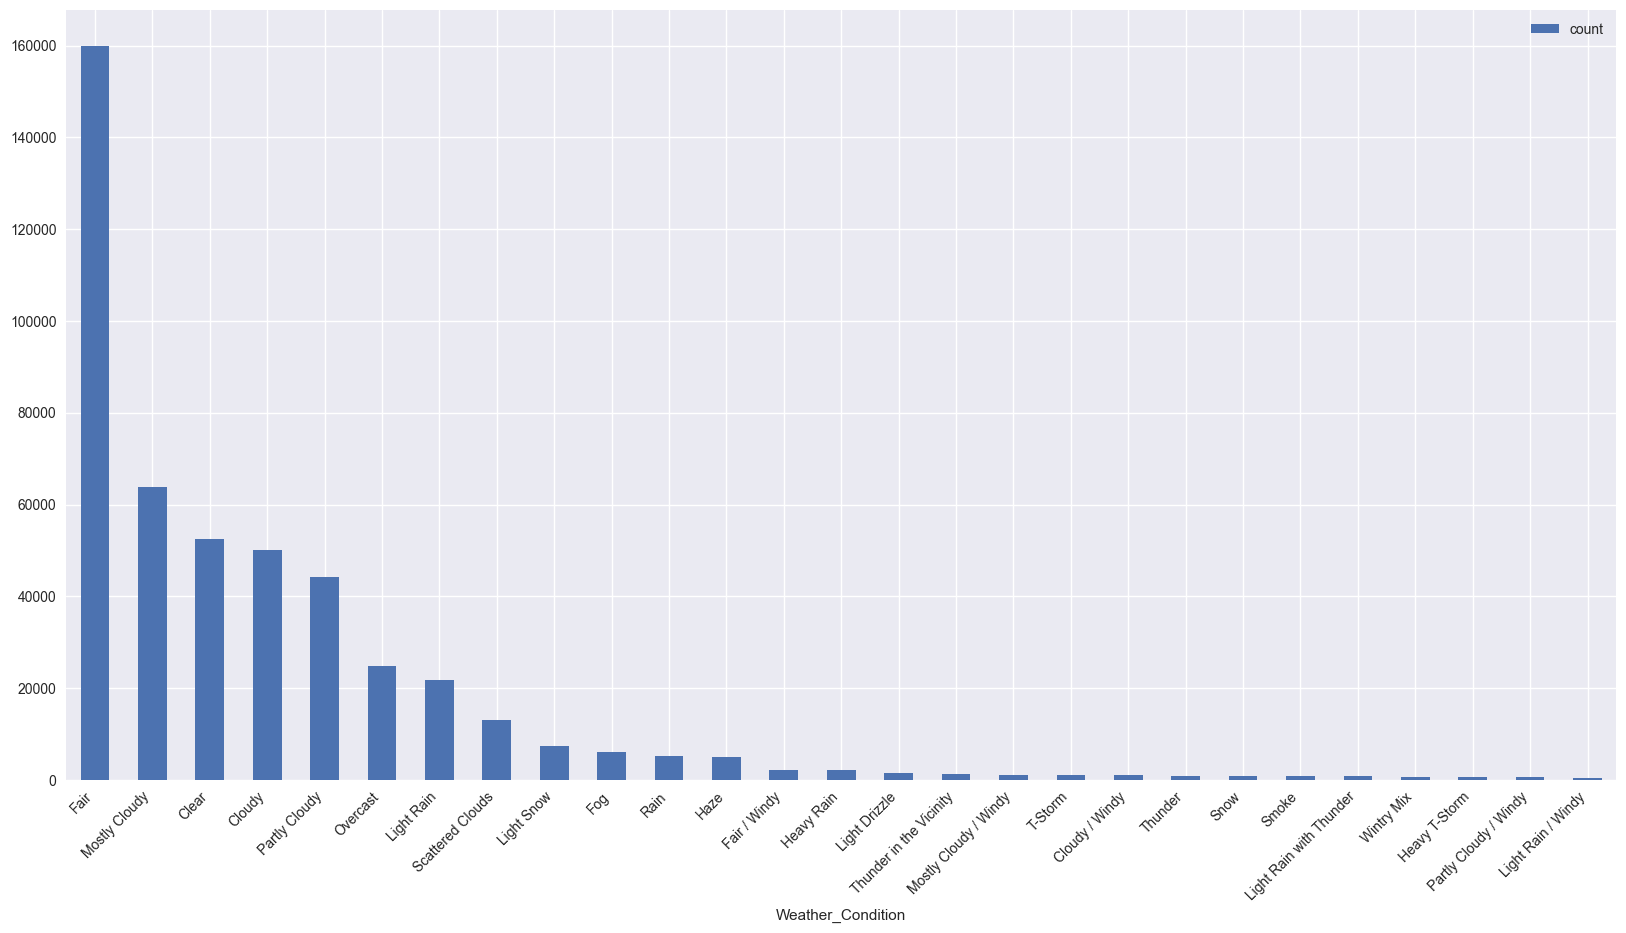

In [13]:
df_count_by_weather_condition = (
    sample_weather_traffic_impact
    .groupby('Weather_Condition')
    .agg(
        count = ('ID', 'count'),
    )
    .sort_values('count', ascending=False)
    .reset_index()
)

ax = (
    df_count_by_weather_condition[df_count_by_weather_condition['count'] >= df_count_by_weather_condition['count'].quantile(0.75)]
    .plot(x='Weather_Condition', y='count',kind='bar', rot=45, figsize=(20,10))
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

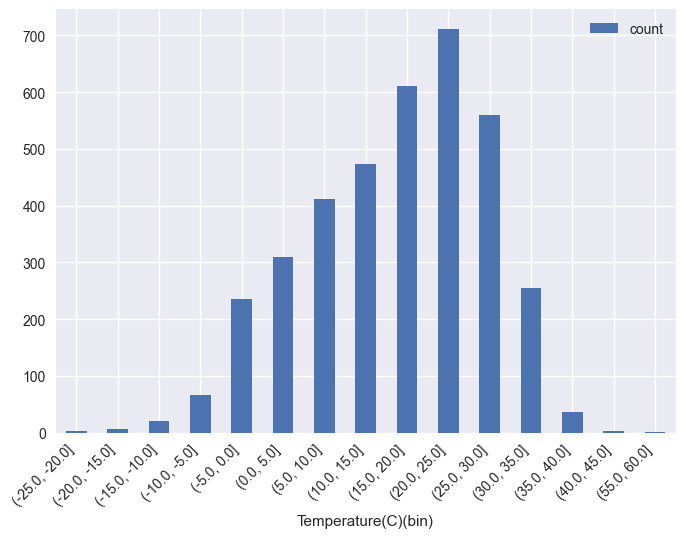

In [14]:
import numpy as np
xx = (
    sample_weather_traffic_impact[(sample_weather_traffic_impact['Weather_Condition'] == 'Fair') & (sample_weather_traffic_impact['Severity'] == 4)]
    .groupby(['Temperature(C)(bin)'], observed=True)
    .agg(
        count=('ID', 'count')
    )
    .reset_index()
    .sort_values('Temperature(C)(bin)', ascending=True)
)
xx
ax = (
    xx
    .head(20)
    .plot(x='Temperature(C)(bin)', y='count', kind='bar', rot=45)
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

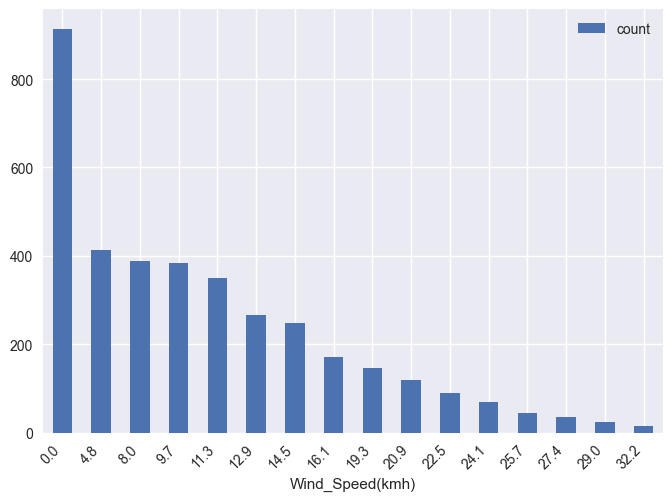

In [15]:
import numpy as np
xx = (
    sample_weather_traffic_impact[(sample_weather_traffic_impact['Weather_Condition'] == 'Fair') & (sample_weather_traffic_impact['Severity'] == 4)]
    .groupby(['Wind_Speed(kmh)'], observed=True)
    .agg(
        count=('ID', 'count')
    )
    .reset_index()
    .sort_values('Wind_Speed(kmh)', ascending=True)
)
xx
ax = (
    xx
    .head(20)
    .plot(x='Wind_Speed(kmh)', y='count', kind='bar', rot=45)
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

gom nhom nhiet do